In [1]:
# Setting up the directory
import os
os.getcwd()
os.chdir('F:\GreatLake_DataAnalytics\Python\Project\CLV\Data')
os.getcwd()

'F:\\GreatLake_DataAnalytics\\Python\\Project\\CLV\\Data'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image

In [32]:
#Upload the data
pd.set_option("display.max_columns", None)
CustomerData=pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
CustomerDataW=pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")

# Basic checkes

In [33]:
CustomerDataW.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
# Determining no. of records and features
print(CustomerDataW.shape)
print(CustomerDataW.columns)

(525461, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')


In [35]:
# Check the Data types of the features
CustomerDataW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   CustomerID   417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [36]:
#Get non-numerical features.
non_num_cols = list(set(CustomerDataW.columns) - set(CustomerDataW.describe().columns))
print('Non-numerical features: ',non_num_cols)

Non-numerical features:  ['Invoice', 'StockCode', 'Description', 'InvoiceDate', 'Country']


# Missing value check

In [37]:
# Check for Missing values in Train
pd.DataFrame(CustomerDataW.isnull().sum(), columns= ['Number of missing values'])
percent_missing_t=round(CustomerDataW.isnull().sum()*100/len(CustomerDataW),2)
missing_value_df_t = pd.DataFrame({'Number of missing values':CustomerDataW.isnull().sum(),
                               'Percentage of missing values': percent_missing_t})
missing_value_df_t.sort_values(by=['Percentage of missing values'],ascending=False).transpose()

,CustomerID,Description,Invoice,StockCode,Quantity,InvoiceDate,Price,Country
Number of missing values,107927.00,2928.00,0.0,0.0,0.0,0.0,0.0,0.0
Percentage of missing values,20.54,0.56,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Drop missing values:
CustomerDataW.dropna(inplace=True)
print(CustomerDataW.shape)

(417534, 8)


In [39]:
# We will drop the records where the invoce has the prefix "C", which indicates those were cancelled invoices
CustomerDataW = CustomerDataW[~CustomerDataW["Invoice"].astype(str).str.contains("C", na=False)]
print(CustomerDataW.shape)

(407695, 8)


In [40]:
# Check whether Quantitiy is less than 0 or not and are there missing values
QR=len(CustomerDataW[CustomerDataW['Quantity'] > 0])
NR=len(CustomerDataW)
if (QR==NR):
    print('All quantity were greater than 0. So We are not dropping any records');
else:
    print('There were records with quantity less than 0, drop records whoese quantity is less than 0')
CustomerDataW.isnull().sum()

All quantity were greater than 0. So We are not dropping any records


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

# Exploratory Data Analysis

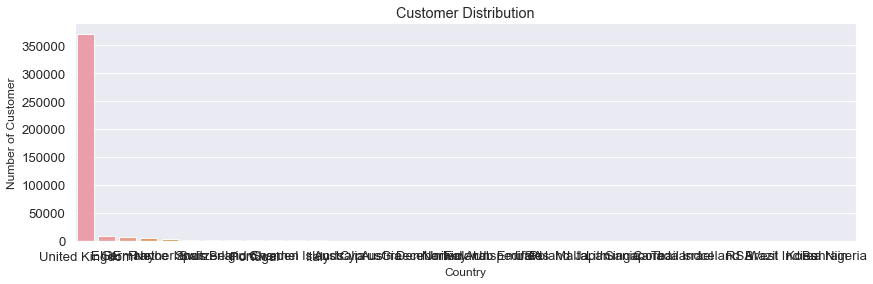

In [41]:
Country_Count = CustomerDataW['Country'].value_counts()
sns.set(style="darkgrid",font_scale=1.2)
plt.figure(figsize=(14, 4))
sns.barplot(Country_Count.index, Country_Count.values, alpha=0.9)
plt.title('Customer Distribution')
plt.ylabel('Number of Customer', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

In [42]:
percent_t=round(Country_Count*100/len(CustomerDataW['Quantity']),2)
CustomerCount=pd.DataFrame({'Number of Customers':Country_Count,
             'Percentage': percent_t})
CustomerCount.transpose()

,United Kingdom,EIRE,Germany,France,Netherlands,Spain,Switzerland,Belgium,Portugal,Sweden,Channel Islands,Italy,Australia,Cyprus,Austria,Greece,Denmark,Norway,Finland,United Arab Emirates,Unspecified,USA,Poland,Malta,Japan,Lithuania,Singapore,Canada,Thailand,Israel,Iceland,RSA,Brazil,West Indies,Korea,Bahrain,Nigeria
Number of Customers,370951.00,8507.00,7661.00,5470.00,2730.00,1235.0,1170.00,1038.00,984.00,868.00,821.0,710.00,630.00,541.00,524.00,512.00,418.0,365.00,347.00,315.00,277.00,230.00,182.00,170.00,164.00,154.00,117.00,77.00,76.00,74.00,71.00,65.00,62.00,54.00,53.00,42.00,30.00
Percentage,90.99,2.09,1.88,1.34,0.67,0.3,0.29,0.25,0.24,0.21,0.2,0.17,0.15,0.13,0.13,0.13,0.1,0.09,0.09,0.08,0.07,0.06,0.04,0.04,0.04,0.04,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01


In [43]:
round(CustomerDataW.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.59,96.84,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.29,34.76,0.0,1.25,1.95,3.75,10953.5
CustomerID,407695.0,15368.50,1679.80,12346.0,13997.00,15321.00,16812.00,18287.0


Text(0.5, 0, 'Count')

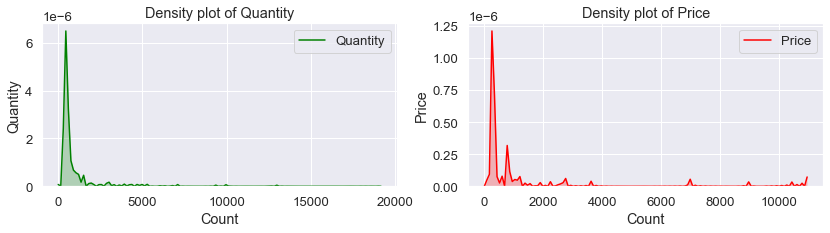

In [44]:
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
sns.kdeplot(CustomerDataW['Quantity'],color='green',shade=True)
plt.title('Density plot of Quantity')
plt.ylabel('Quantity')
plt.xlabel('Count')
plt.subplot(1,2,2)
sns.kdeplot(CustomerDataW['Price'],shade=True,color='red')
plt.title('Density plot of Price')
plt.ylabel('Price')
plt.xlabel('Count')

# Creation of Analysis Base Table to calcuate Customer Lifetime Value

In [47]:
# Calculate Total price using Quantity and Price
CustomerDataW["TotalPrice"] = CustomerDataW["Quantity"] * CustomerDataW["Price"]

In [89]:
#Create DataFrame by grouping the transaction based on Customer ID and rename the columns
CLife = CustomerDataW.groupby('CustomerID').agg({'Invoice': lambda x: len(x),
                                         'Quantity': lambda x: x.sum(),
                                         'TotalPrice': lambda x: x.sum()})
CLife.columns = ['Total_Transaction', 'Total_Quantity', 'Total_Price']
CLife.head()

,Total_Transaction,Total_Quantity,Total_Price
CustomerID,,,
12346.0,33,70,372.86
12347.0,71,828,1323.32
12348.0,20,373,222.16
12349.0,102,993,2671.14
12351.0,21,261,300.93


In [90]:
CLife.shape[0] # Total cusotmer were 4314

4314

In [91]:
# Calculate, Average_Order_Value = Total_Revenue / Total_Number_of_Orders
CLife["Avg.order_value"] = CLife["Total_Price"]/CLife["Total_Transaction"]
#Calculate,Purchase Frequency= Total_Number_of_Orders / Total_Number_of_Customers
CLife["Purchase_Frequency"] = CLife["Total_Transaction"]/len(CLife)
#Calculate, Cusotmer frequency
CFrequency = CLife[CLife.Total_Transaction > 1].shape[0]/len(CLife)
#Calculate, Customer Chrun
CChurn = 1 - CFrequency
#Calculate, Profit margin considering @ 10%
CLife["Profit_margin"] = CLife["Total_Price"] * (10/100)

In [92]:
CLife.head()

,Total_Transaction,Total_Quantity,Total_Price,Avg.order_value,Purchase_Frequency,Profit_margin
CustomerID,,,,,,
12346.0,33,70,372.86,11.298788,0.007650,37.286
12347.0,71,828,1323.32,18.638310,0.016458,132.332
12348.0,20,373,222.16,11.108000,0.004636,22.216
12349.0,102,993,2671.14,26.187647,0.023644,267.114
12351.0,21,261,300.93,14.330000,0.004868,30.093


In [93]:
#Calculate, Customer Lifetime Value
# Customer Value(CV):
CLife["CV"] = CLife["Avg.order_value"] * CLife["Purchase_Frequency"]
#Customer Lifetime Value(CLTV):
CLife["CLV"] = (CLife["CV"] /CChurn) * CLife["Profit_margin"]

In [94]:
CLife.sort_values("CLV", ascending = False).head(10)

,Total_Transaction,Total_Quantity,Total_Price,Avg.order_value,Purchase_Frequency,Profit_margin,CV,CLV
CustomerID,,,,,,,,
18102.0,627,124216,349164.35,556.880941,0.145341,34916.435,80.937494,1.310922e+08
14646.0,1774,170342,248396.50,140.020575,0.411219,24839.650,57.579161,6.634497e+07
14156.0,2648,108107,196566.74,74.232153,0.613815,19656.674,45.564845,4.154676e+07
14911.0,5570,69722,152147.57,27.315542,1.291145,15214.757,35.268329,2.489127e+07
13694.0,957,125893,131443.19,137.349206,0.221836,13144.319,30.468982,1.857776e+07
17511.0,948,55107,84541.17,89.178449,0.219750,8454.117,19.596933,7.685171e+06
15061.0,584,51791,83284.38,142.610240,0.135373,8328.438,19.305605,7.458374e+06
16684.0,441,54555,80489.21,182.515215,0.102225,8048.921,18.657675,6.966143e+06
16754.0,140,63551,65500.07,467.857643,0.032452,6550.007,15.183141,4.613182e+06


In [95]:
# CLV - converted between 1 and 100 using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (1,100))
scaler.fit(CLife[["CLV"]])
CLife["Scaled_CLV"] = scaler.transform(CLife[["CLV"]])
CLife.sort_values("CLV", ascending = False).head(10)

,Total_Transaction,Total_Quantity,Total_Price,Avg.order_value,Purchase_Frequency,Profit_margin,CV,CLV,Scaled_CLV
CustomerID,,,,,,,,,
18102.0,627,124216,349164.35,556.880941,0.145341,34916.435,80.937494,1.310922e+08,100.000000
14646.0,1774,170342,248396.50,140.020575,0.411219,24839.650,57.579161,6.634497e+07,51.103302
14156.0,2648,108107,196566.74,74.232153,0.613815,19656.674,45.564845,4.154676e+07,32.375848
14911.0,5570,69722,152147.57,27.315542,1.291145,15214.757,35.268329,2.489127e+07,19.797732
13694.0,957,125893,131443.19,137.349206,0.221836,13144.319,30.468982,1.857776e+07,15.029803
17511.0,948,55107,84541.17,89.178449,0.219750,8454.117,19.596933,7.685171e+06,6.803793
15061.0,584,51791,83284.38,142.610240,0.135373,8328.438,19.305605,7.458374e+06,6.632517
16684.0,441,54555,80489.21,182.515215,0.102225,8048.921,18.657675,6.966143e+06,6.260787
16754.0,140,63551,65500.07,467.857643,0.032452,6550.007,15.183141,4.613182e+06,4.483846


In [96]:
CLife[["Total_Transaction", "Total_Quantity","Total_Price","CLV", "Scaled_CLV"]].sort_values(by = "Scaled_CLV",ascending= False).head(10)

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV
CustomerID,,,,,
18102.0,627,124216,349164.35,1.310922e+08,100.000000
14646.0,1774,170342,248396.50,6.634497e+07,51.103302
14156.0,2648,108107,196566.74,4.154676e+07,32.375848
14911.0,5570,69722,152147.57,2.489127e+07,19.797732
13694.0,957,125893,131443.19,1.857776e+07,15.029803
17511.0,948,55107,84541.17,7.685171e+06,6.803793
15061.0,584,51791,83284.38,7.458374e+06,6.632517
16684.0,441,54555,80489.21,6.966143e+06,6.260787
16754.0,140,63551,65500.07,4.613182e+06,4.483846


# Customer Segmentation

In [97]:
#Segmenting Customer based qcut function
CLife["Segment"] = pd.qcut(CLife["Scaled_CLV"], 4, labels = ["LowerBronze", "Bronze", "Silver", "Gold"])

In [98]:
CLife.head(10)

,Total_Transaction,Total_Quantity,Total_Price,Avg.order_value,Purchase_Frequency,Profit_margin,CV,CLV,Scaled_CLV,Segment
CustomerID,,,,,,,,,,
12346.0,33,70,372.86,11.298788,0.007650,37.286,0.086430,149.488795,1.000113,Bronze
12347.0,71,828,1323.32,18.638310,0.016458,132.332,0.306750,1882.984755,1.001422,Silver
12348.0,20,373,222.16,11.108000,0.004636,22.216,0.051497,53.069963,1.000040,LowerBronze
12349.0,102,993,2671.14,26.187647,0.023644,267.114,0.619179,7672.031075,1.005794,Gold
12351.0,21,261,300.93,14.330000,0.004868,30.093,0.069757,97.375124,1.000074,LowerBronze
12352.0,18,188,343.80,19.100000,0.004172,34.380,0.079694,127.095097,1.000096,Bronze
12353.0,20,192,317.76,15.888000,0.004636,31.776,0.073658,108.571417,1.000082,Bronze
12355.0,22,303,488.21,22.191364,0.005100,48.821,0.113169,256.289252,1.000194,Bronze
12356.0,84,1826,3562.25,42.407738,0.019471,356.225,0.825742,13644.758132,1.010304,Gold


In [99]:
CLife.groupby("Segment")[["Total_Transaction", "Total_Quantity", "Total_Price", "CLV", "Scaled_CLV"]].agg(
    {"count", "median","mean", "sum"})

Total_Transaction                          Total_Quantity  \
                          sum        mean count median            sum   
Segment                                                                 
LowerBronze             18494   17.124074  1080   12.0         117735   
Bronze                  42239   39.219127  1077   29.0         305016   
Silver                  87955   81.590909  1078   63.0         733211   
Gold                   259007  240.043559  1079  153.0        4383262   

                                        Total_Price                     \
                    mean count  median          sum         mean count   
Segment                                                                  
LowerBronze   109.013889  1080    93.0   192573.080   178.308407  1080   
Bronze        283.208914  1077   250.0   512708.503   476.052463  1077   
Silver        680.158627  1078   602.0  1219605.200  1131.359184  1078   
Gold         4062.337349  1079  1800.0  6907116.491  6401.405460  1079   

                                CLV                                     \
               median           sum           mean count        median   
Segment                                                                  
LowerBronze   177.805  4.363848e+04      40.405996  1080     33.994227   
Bronze        461.680  2.777458e+05     257.888350  1077    229.191852   
Silver       1084.185  1.582197e+06    1467.715560  1078   1263.932644   
Gold         3138.040  3.859206e+08  357665.064760  1079  10588.489292   

              Scaled_CLV                            
                     sum      mean count    median  
Segment                                             
LowerBronze  1080.032956  1.000031  1080  1.000026  
Bronze       1077.209752  1.000195  1077  1.000173  
Silver       1079.194865  1.001108  1078  1.000955  
Gold         1370.444805  1.270106  1079  1.007996

# K-Means Clustering

In [100]:
CustomerSegKM=CLife[["Total_Transaction", "Total_Quantity","Total_Price","CLV", "Scaled_CLV"]]

In [101]:
CustomerSegKM.head()

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV
CustomerID,,,,,
12346.0,33,70,372.86,149.488795,1.000113
12347.0,71,828,1323.32,1882.984755,1.001422
12348.0,20,373,222.16,53.069963,1.000040
12349.0,102,993,2671.14,7672.031075,1.005794
12351.0,21,261,300.93,97.375124,1.000074


In [103]:
# Exporting Final Train data into CSV format
CustomerSegKM.to_csv(r'F:\GreatLake_DataAnalytics\Python\Project\CLV\Data\CustomerSegment.csv', index=False)

In [104]:
CustomerSegKM.head()

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV
CustomerID,,,,,
12346.0,33,70,372.86,149.488795,1.000113
12347.0,71,828,1323.32,1882.984755,1.001422
12348.0,20,373,222.16,53.069963,1.000040
12349.0,102,993,2671.14,7672.031075,1.005794
12351.0,21,261,300.93,97.375124,1.000074


In [105]:
print(CustomerSegKM.columns)

Index(['Total_Transaction', 'Total_Quantity', 'Total_Price', 'CLV',
       'Scaled_CLV'],
      dtype='object')


In [107]:
# Scaling the variables
from sklearn import preprocessing
from pandas import DataFrame
col_names=CustomerSegKM.columns
scaler=preprocessing.StandardScaler()
scaled_CustomerSegKM=scaler.fit_transform(CustomerSegKM)
scaled_CustomerSegKM=DataFrame(scaled_CustomerSegKM,columns=col_names) # Converting the array back to dataframe
scaled_CustomerSegKM

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV
0,-0.304486,-0.187994,-0.187895,-0.037641,-0.037641
1,-0.116364,-0.070615,-0.081240,-0.036913,-0.036913
2,-0.368843,-0.141074,-0.204806,-0.037681,-0.037681
3,0.037104,-0.045064,0.070005,-0.034486,-0.034486
4,-0.363893,-0.158417,-0.195967,-0.037662,-0.037662
...,...,...,...,...,...
4309,0.670778,-0.146803,-0.157720,-0.037517,-0.037517
4310,-0.329239,-0.122336,-0.177929,-0.037607,-0.037607
4311,-0.408448,-0.176380,-0.181820,-0.037621,-0.037621
4312,-0.136166,-0.104683,-0.084257,-0.036945,-0.036945


In [204]:
#Finding optimal no. of clusters using Elbow method
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=32)
    model.fit(scaled_CustomerSegKM)
    prediction=model.predict(scaled_CustomerSegKM)
    meanDistortions.append(sum(np.min(cdist(scaled_CustomerSegKM, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_CustomerSegKM.shape[0])

In [207]:
#Finding optimal no. of clusters using Silhouette score
from sklearn.metrics import silhouette_samples,silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_coefficients = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=32)
    kmeans.fit(scaled_CustomerSegKM)
    score = silhouette_score(scaled_CustomerSegKM, kmeans.labels_)
    silhouette_coefficients.append(score)
    
    cluster_labels = kmeans.fit_predict(scaled_CustomerSegKM)
    silhouette_avg = silhouette_score(scaled_CustomerSegKM,cluster_labels)
    print("For clussters",k,
         "The average silhouette score is",silhouette_avg)

For clussters 2 The average silhouette score is 0.9848762221133889
For clussters 3 The average silhouette score is 0.9585112414643402
For clussters 4 The average silhouette score is 0.9244461127173567
For clussters 5 The average silhouette score is 0.9258324295855768
For clussters 6 The average silhouette score is 0.7394047792057429
For clussters 7 The average silhouette score is 0.7530097255836044
For clussters 8 The average silhouette score is 0.7310036503019259


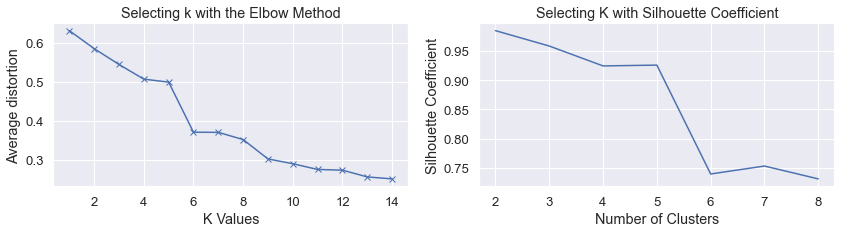

In [208]:
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('K Values')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_coefficients)
plt.xticks(range_n_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Selecting K with Silhouette Coefficient')
plt.show()

In [234]:
final_model=KMeans(n_clusters=2)
final_model.fit(scaled_CustomerSegKM)
prediction=final_model.predict(scaled_CustomerSegKM)

#Append the prediction 
CustomerSegKM["GROUP"] = prediction
#print("Groups Assigned : \n")
#tech_supp_df[["PROBLEM_TYPE", "GROUP"]]
CustomerSegKM.head()

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV,GROUP
CustomerID,,,,,,
12346.0,33,70,372.86,149.488795,1.000113,0
12347.0,71,828,1323.32,1882.984755,1.001422,0
12348.0,20,373,222.16,53.069963,1.000040,0
12349.0,102,993,2671.14,7672.031075,1.005794,0
12351.0,21,261,300.93,97.375124,1.000074,0


In [235]:
CustomerSegKM['GROUP'] = CustomerSegKM['GROUP'].apply(int)
CustomerSegKM.dtypes
replace_map = {'GROUP': {0:'Gold',1:'Silver'}}
CustomerSegKM.replace(replace_map, inplace=True)
CustomerSegKM.head()

,Total_Transaction,Total_Quantity,Total_Price,CLV,Scaled_CLV,GROUP
CustomerID,,,,,,
12346.0,33,70,372.86,149.488795,1.000113,Gold
12347.0,71,828,1323.32,1882.984755,1.001422,Gold
12348.0,20,373,222.16,53.069963,1.000040,Gold
12349.0,102,993,2671.14,7672.031075,1.005794,Gold
12351.0,21,261,300.93,97.375124,1.000074,Gold


In [236]:
CustomerSegKM.groupby("GROUP")[["Total_Transaction", "Total_Quantity", "Total_Price", "CLV", "Scaled_CLV"]].agg(
    {"count", "median","mean", "sum"})

Total_Transaction                            Total_Quantity  \
                     sum         mean count  median            sum   
GROUP                                                                
Gold              397076    92.129002  4310    44.0        5066837   
Silver             10619  2654.750000     4  2211.0         472387   

                                       Total_Price                       \
                 mean count    median          sum           mean count   
GROUP                                                                     
Gold      1175.600232  4310     381.5  7885728.114    1829.635293  4310   
Silver  118096.750000     4  116161.5   946275.160  236568.790000     4   

                            CLV                                    \
           median           sum          mean count        median   
GROUP                                                               
Gold       704.93  1.239490e+08  2.875847e+04  4310  5.343294e+02   
Silver  222481.62  2.638752e+08  6.596880e+07     4  5.394586e+07   

         Scaled_CLV                              
                sum       mean count     median  
GROUP                                            
Gold    4403.605497   1.021718  4310   1.000404  
Silver   203.276882  50.819220     4  41.739575